In [2]:
!pip3 install torch torchvision torchaudio

  Obtaining dependency information for torchvision from https://files.pythonhosted.org/packages/cc/1b/d781261269b3d0a5da35feda8e0b5ca7d25f5d08945bc6fba809e8cb7cbc/torchvision-0.16.0-cp38-cp38-win_amd64.whl.metadata
  Obtaining dependency information for torchaudio from https://files.pythonhosted.org/packages/8e/35/32118119398e613571fe51f0532cabae093342c613b4ea410517603a5a8e/torchaudio-2.1.0-cp38-cp38-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ----------- ---------------------------- 0.4/1.3 MB 11.6 MB/s eta 0:00:01
   -------------------- ------------------- 0.6/1.3 MB 8.1 MB/s eta 0:00:01
   ---------------------------------------  1.3/1.3 MB 8.9 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 8.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------- ----------------------------- 0.6/2.3 MB 13.4 MB/s eta 0:00:01
   ------------------- -------------------- 1.1/2.3 M

## Pytorch

In [4]:
import torch

In [5]:
# 일반적인 코드
x = 3.5
y = x*x + 2
x, y

(3.5, 14.25)

In [6]:
# 토치에서
x = torch.tensor(3.5)
x

tensor(3.5000)

In [7]:
# 기울기를 계산할 수 있는 옵션 : requires_grad
x = torch.tensor(3.5, requires_grad=True)
x

tensor(3.5000, requires_grad=True)

In [8]:
# 만약 어떤 함수에서 x가 3.5일 때의 함수값을 찾고 싶다면
y = (x-1)*(x-2)*(x-3)
y

tensor(1.8750, grad_fn=<MulBackward0>)

In [9]:
# x값에서의 기울기 계산
y.backward()
x.grad

tensor(5.7500)

In [10]:
# 또 다른 복잡한 식
a = torch.tensor(2.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

x = 2*a + 3*b
y = 5*a*a + 3*b*b*b
z = 2*x + 3*y

# a의 기울기
z.backward()
a.grad

tensor(64.)

## 보스턴 집값 예측

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
boston = load_boston()
boston.DESCR

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [12]:
from sklearn import datasets
X, y = datasets.fetch_openml('boston', return_X_y=True)
X

c:\Users\nabi4\anaconda3\envs\ds_study\lib\site-packages\sklearn\datasets\_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
c:\Users\nabi4\anaconda3\envs\ds_study\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [14]:
import torch
import torch.nn as nn 
import torch.nn.functional as F 
import torch.optim as optim 

# 필요한 특성 선택
cols = ['INDUS', 'RM', "LSTAT", "NOX", "DIS"]
# numpy배열을 torch 텐서로 변환하고 float으로 변환
data_x = torch.from_numpy(X[cols].values).float()
data_y = torch.from_numpy(y.values).float()

data_x.shape

torch.Size([506, 5])

In [15]:
data_x

tensor([[ 2.3100,  6.5750,  4.9800,  0.5380,  4.0900],
        [ 7.0700,  6.4210,  9.1400,  0.4690,  4.9671],
        [ 7.0700,  7.1850,  4.0300,  0.4690,  4.9671],
        ...,
        [11.9300,  6.9760,  5.6400,  0.5730,  2.1675],
        [11.9300,  6.7940,  6.4800,  0.5730,  2.3889],
        [11.9300,  6.0300,  7.8800,  0.5730,  2.5050]])

In [17]:
# 변수 정리
X = data_x
y = data_y.reshape(len(y), 1)
print(X.shape, y.shape)

torch.Size([506, 5]) torch.Size([506, 1])


In [18]:
# 하이퍼파라미터
n_epochs = 2000
learning_rate = 1e-3
print_interval = 100

In [21]:
X.size(-1)

5

In [22]:
# torch linear 모델
# https://pytorch.org/docs/stable/generated/torch.nn.Linear.html

# 모델링
# nn.Linear(X 사이즈, y 사이즈, bias)
model = nn.Linear(X.size(-1), y.size(-1))
model

Linear(in_features=5, out_features=1, bias=True)

In [24]:
# optimizer
optimizer = optim.SGD(model.parameters(), lr = learning_rate)

# 학습
for i in range(n_epochs):
    y_hat = model(X) # 예측값
    loss = F.mse_loss(y_hat, y) # loss 계산

    optimizer.zero_grad() # optimizer의 gradient 초기화
    # 각 학습 단계마다의 gradient값 그 자체를 가지기 위해 
    # 이전 학습 단계에서 사용했던 gradient는 초기화해주어야함
    loss.backward() # 모델의 파라미터에 대한 gradient 계산 -> 역전파 계산 

    optimizer.step() # 계산된 gradient를 사용하여 파라미터(weight, bias) 업데이트

    if (i + 1) % print_interval == 0: # 100번째마다 loss 출력
        print('Epoch %d : loss = %.4e' % (i + 1, loss))

Epoch 100 : loss = 4.2027e+01
Epoch 200 : loss = 3.6253e+01
Epoch 300 : loss = 3.3065e+01
Epoch 400 : loss = 3.1269e+01
Epoch 500 : loss = 3.0256e+01
Epoch 600 : loss = 2.9685e+01
Epoch 700 : loss = 2.9363e+01
Epoch 800 : loss = 2.9181e+01
Epoch 900 : loss = 2.9078e+01
Epoch 1000 : loss = 2.9020e+01
Epoch 1100 : loss = 2.8987e+01
Epoch 1200 : loss = 2.8968e+01
Epoch 1300 : loss = 2.8957e+01
Epoch 1400 : loss = 2.8951e+01
Epoch 1500 : loss = 2.8947e+01
Epoch 1600 : loss = 2.8944e+01
Epoch 1700 : loss = 2.8943e+01
Epoch 1800 : loss = 2.8941e+01
Epoch 1900 : loss = 2.8940e+01
Epoch 2000 : loss = 2.8939e+01


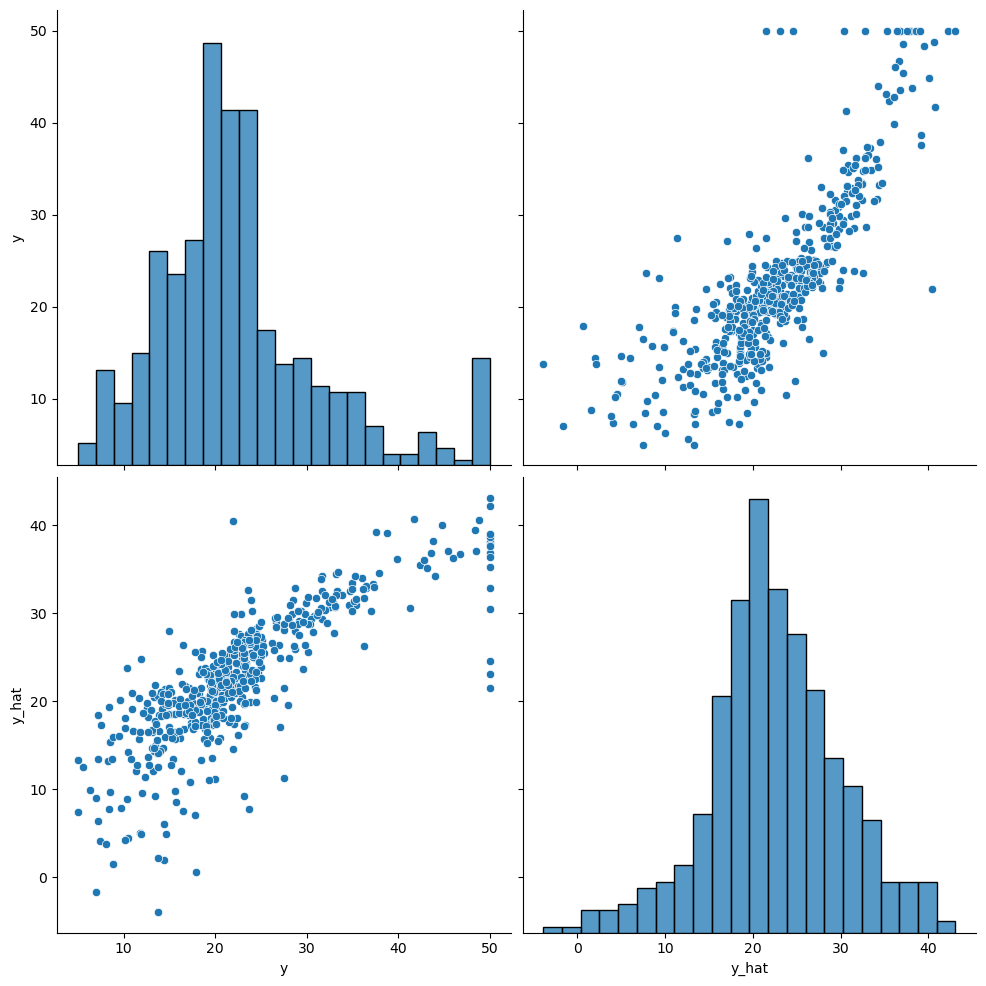

In [25]:
# 결과 정리
df = pd.DataFrame(torch.cat([y, y_hat], dim = 1).detach_().numpy(),
                  columns = ['y', 'y_hat'])
sns.pairplot(df, height=5)
plt.show()

## Breast Cancer

In [26]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

cancer.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.  For inst

In [27]:
# 데이터 정리
df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df['class'] = cancer.target

df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [29]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'class'],
      dtype='object')

In [30]:
# 특정 컬럼 추출
cols = ['mean radius', 'mean texture','mean smoothness', 'mean compactness','mean concave points',
        'worst radius', 'worst texture','worst smoothness', 'worst compactness','worst concave points', 
        'class']
len(cols)

11

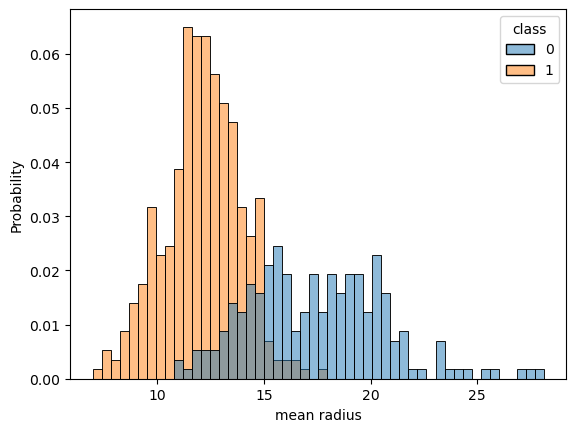

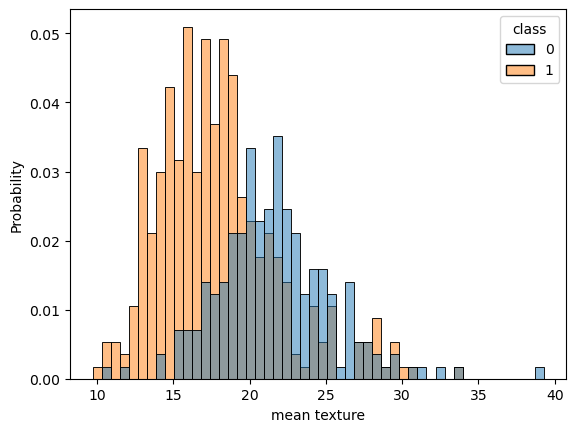

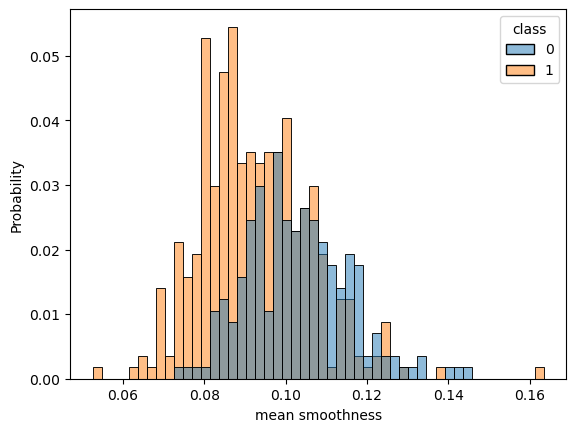

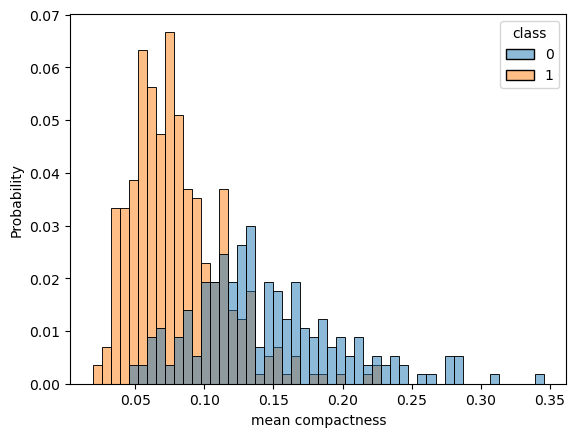

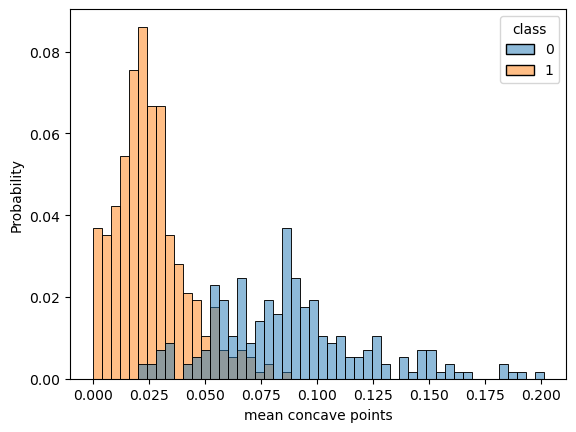

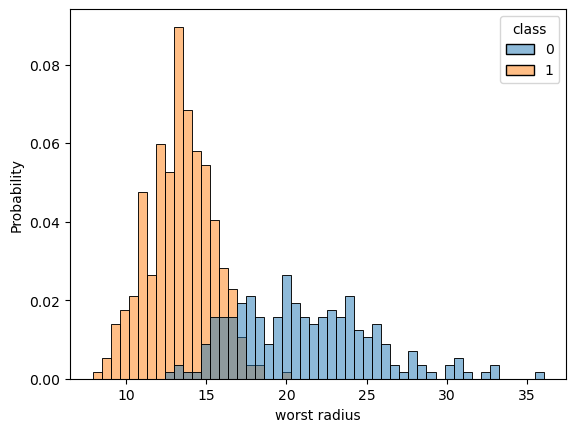

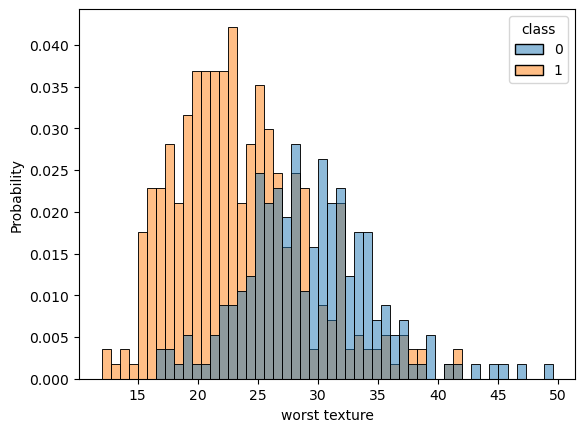

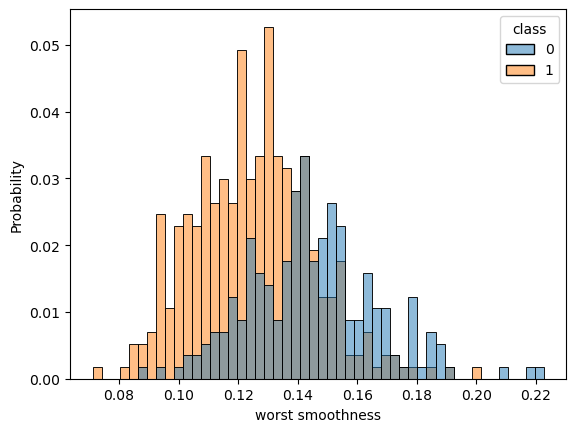

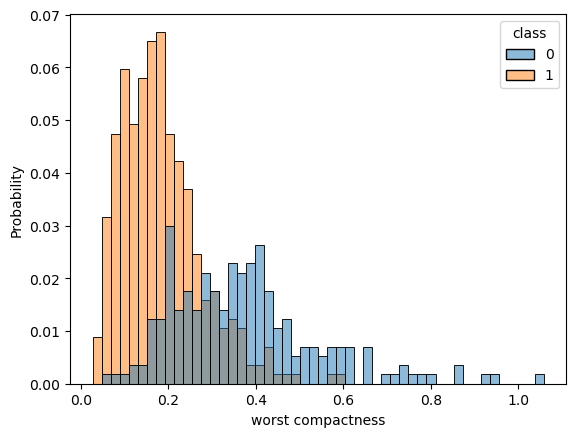

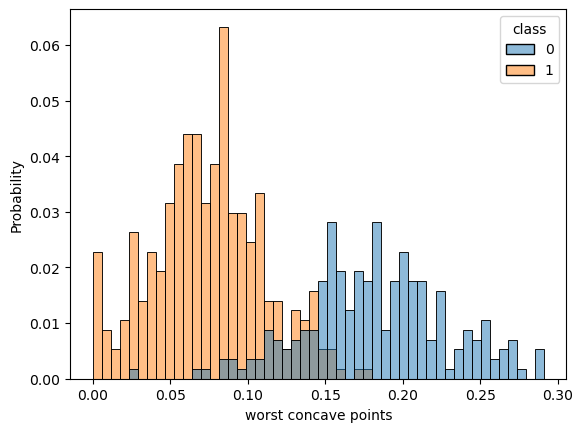

In [31]:
# 타겟 데이터 별 각 컬럼의 분포 
for c in cols[:-1]:
    sns.histplot(df, x = c, hue = cols[-1], bins = 50, stat = 'probability')
    plt.show()

In [32]:
# torch화
data = torch.from_numpy(df[cols].values).float()
data.shape

torch.Size([569, 11])

In [33]:
# 데이터 분리
X = data[:, :-1]
y = data[:, -1:]
X.shape, y.shape

(torch.Size([569, 10]), torch.Size([569, 1]))

In [37]:
# 하이퍼파라미터
n_epochs = 200000
learning_rate = 1e-2
print_interval = 10000

# 모델링(Pytorch 모델을 구현하기 위한 클래스)
class MyModel(nn.Module): # nn.Module을 상속받는 클래스 정의

    # 모델의 초기화
    def __init__(self, input_dim, output_dim):
        self.input_dim = input_dim
        self.output_dim = output_dim

        # super 설정을 해주어야지만 nn.Module의 속성을 상속받음
        super().__init__()

        # 모델 설정
        self.linear = nn.Linear(input_dim, output_dim) # 선형 모델
        self.act = nn.Sigmoid() # output은 sigmoid(데이터가 이진분류이니깐)

    # 순방향 연산
    def forward(self, x):
        y = self.act(self.linear(x))
        
        return y

In [38]:
# 모델 선언 및 loss, optimizer 선언
model = MyModel(input_dim = X.size(-1), output_dim = y.size(-1))

crit = nn.BCELoss() # loss function : Binary Cross Entropy

optimizer = optim.SGD(model.parameters(), lr = learning_rate)

In [40]:
# 학습
for i in range(n_epochs):
    y_hat = model(X)
    loss = crit(y_hat, y)

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

    if (i + 1) % print_interval == 0: # 100번째마다 loss 출력
        print('Epoch %d : loss = %.4e' % (i + 1, loss))

Epoch 10000 : loss = 2.7724e-01
Epoch 20000 : loss = 2.2867e-01
Epoch 30000 : loss = 1.9968e-01
Epoch 40000 : loss = 1.8077e-01
Epoch 50000 : loss = 1.6755e-01
Epoch 60000 : loss = 1.5781e-01
Epoch 70000 : loss = 1.5035e-01
Epoch 80000 : loss = 1.4443e-01
Epoch 90000 : loss = 1.3963e-01
Epoch 100000 : loss = 1.3565e-01
Epoch 110000 : loss = 1.3229e-01
Epoch 120000 : loss = 1.2942e-01
Epoch 130000 : loss = 1.2693e-01
Epoch 140000 : loss = 1.2476e-01
Epoch 150000 : loss = 1.2283e-01
Epoch 160000 : loss = 1.2112e-01
Epoch 170000 : loss = 1.1958e-01
Epoch 180000 : loss = 1.1820e-01
Epoch 190000 : loss = 1.1694e-01
Epoch 200000 : loss = 1.1579e-01


In [41]:
# 성능 평가
correct_cnt = (y == (y_hat > .5)).sum()
total_cnt = float(y.size(0))

print('Accuracy : %.4f' % (correct_cnt / total_cnt))

Accuracy : 0.9649


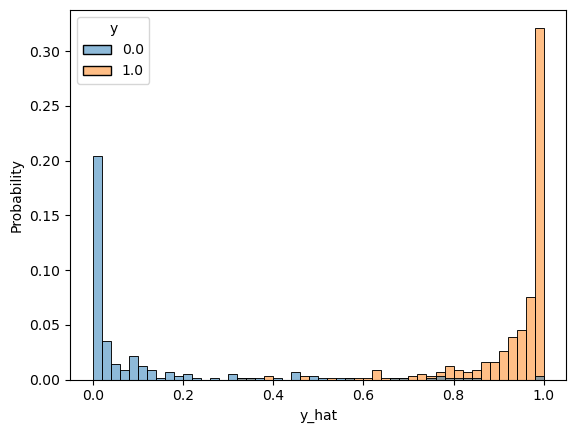

In [42]:
# 예측값의 분포 확인
df = pd.DataFrame(torch.cat([y, y_hat], dim = 1).detach().numpy(),
                  columns = ['y', 'y_hat'])
sns.histplot(df, x = 'y_hat', hue = 'y', bins = 50, stat = 'probability')
plt.show()

0과 1에 분포가 몰려있는 것을 보아 잘 분류한 것 같다.

## mnist

In [43]:
import torch
import torch.nn as nn 
import torch.nn.functional as F 
import torch.optim as optim 
from torchvision import datasets, transforms

from matplotlib import pyplot as plt

In [44]:
# cuda 환경 설정
is_cuda = torch.cuda.is_available()
device = torch.device('cuda' if is_cuda else 'cpu')

print('Current cuda device is ', device)

Current cuda device is  cpu


지금은 gpu 설정이 되어있지 않아 cpu를 사용하지만 colab에서 런타임 유형을 gpu로 바꾸고 해당 코드를 실행하면 cuda 환경으로 코드를 실행시킬 수 있게 된다.

In [46]:
# 데이터 준비
# datasets 모듈에 있는 MNIST 데이터를 바로 다운받고 
# tensor로 까지 변환까지 해줌
train_data = datasets.MNIST(root = './data', train = True, 
                            download=True, transform=transforms.ToTensor())
test_data = datasets.MNIST(root = './data', train = False, 
                           transform=transforms.ToTensor())

print('Number of training data : ' , len(train_data))
print('Number of test data : ' , len(test_data))

100%|██████████| 9912422/9912422 [00:01<00:00, 7815205.14it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|██████████| 28881/28881 [00:00<00:00, 403246.64it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw



100%|██████████| 1648877/1648877 [00:00<00:00, 9240581.43it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|██████████| 4542/4542 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw

Number of training data :  60000
Number of test data :  10000


In [60]:
train_data[193]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

픽셀값 , 라벨이 있음

In [67]:
train_data[193][0].shape

torch.Size([1, 28, 28])

위와 같이 tensor에는 채널에 해당하는 dim이 맨 앞에 와있다.

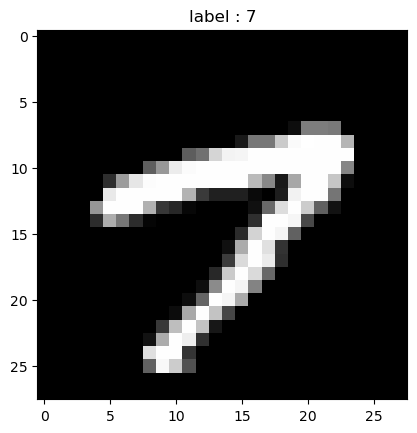

In [48]:
# 데이터 보기
image, label = train_data[193]

# sqeeze() : dim이 1인 것을 삭제시킴
plt.imshow(image.squeeze().numpy(), cmap = 'gray')
plt.title('label : %s' %label)
plt.show()

In [50]:
# 미니 배치 구성
# 배치 단위로 나누어 처리하면 다양한 이점이 있음
# 메모리 사용량 감소 / 학습속도 향상 등등
batch_size = 50
learning_rate = 0.0001
epoch_num = 15

train_loader = torch.utils.data.DataLoader(dataset = train_data, 
                                           batch_size = batch_size,
                                           shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_data, 
                                           batch_size = batch_size,
                                           shuffle = True)
first_batch = train_loader.__iter__().__next__() # 첫번째 배치만 가져옴

In [51]:
# 결과 확인
print('{:15s} | {:<25s} | {}'.format('name', 'type', 'size'))
print('{:15s} | {:<25s} | {}'.format('Num of Batch', '', len(train_loader)))
print('{:15s} | {:<25s} | {}'.format('first_batch', str(type(first_batch)),
                                     len(first_batch)))
print('{:15s} | {:<25s} | {}'.format('first_batch[0]', str(type(first_batch[0])),
                                     first_batch[0].shape))
print('{:15s} | {:<25s} | {}'.format('first_batch[1]', str(type(first_batch[1])),
                                     first_batch[1].shape))

name            | type                      | size
Num of Batch    |                           | 1200
first_batch     | <class 'list'>            | 2
first_batch[0]  | <class 'torch.Tensor'>    | torch.Size([50, 1, 28, 28])
first_batch[1]  | <class 'torch.Tensor'>    | torch.Size([50])


In [55]:
# 모델링
class CNN(nn.Module): # nn.Module을 상속받는 클래스 정의

    # 모델의 초기화
    def __init__(self):
        super(CNN, self).__init__()
        ## nn.Conv2D(입력받는 채널 수, 출력할 채널 수, 커널 사이즈, stride 수, 제로패딩 옵션)
        self.conv1 = nn.Conv2d(1, 32, 3, 1, padding = 'same')
        self.conv2 = nn.Conv2d(32, 64, 3, 1, padding = 'same')
        self.dropout = nn.Dropout2d(0.25)
        self.fc1 = nn.Linear(3136, 1000) # 7*7*64 = 3136
        self.fc2 = nn.Linear(1000, 10)
        
    # 순방향 연산
    def forward(self, x):
        x = self.conv1(x) # (28, 28)
        x = F.relu(x)
        x = F.max_pool2d(x, 2) # (14, 14)

        x = self.conv2(x) # (14, 14)
        x = F.relu(x)
        x = F.max_pool2d(x, 2) # (7, 7)

        x = self.dropout(x)
        x = torch.flatten(x, 1)

        x = self.fc1(x)
        x = F.relu(x)

        x = self.fc2(x)
        output = F.log_softmax(x, dim = 1)
        return output

In [56]:
# 선언
model = CNN().to(device)
optimizer = optim.Adam(model.parameters(), lr = learning_rate)
criterion = nn.CrossEntropyLoss()

In [58]:
# 학습
model.train() # 학습 모드 선언

i = 1 # 실제 학습
for epoch in range(epoch_num):
    for data, target in train_loader: # 배치 단위로 나눈 데이터
        data = data.to(device)
        target = target.to(device)

        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)

        loss.backward()

        optimizer.step()

        if i % 1000 == 0: # 100번째마다 loss 출력
            print('Train Step : {}\tLoss: {:.3f}'.format(i, loss.item()))
        i += 1

Train Step : 1000	Loss: 0.009
Train Step : 2000	Loss: 0.133
Train Step : 3000	Loss: 0.109
Train Step : 4000	Loss: 0.005
Train Step : 5000	Loss: 0.093
Train Step : 6000	Loss: 0.043
Train Step : 7000	Loss: 0.002
Train Step : 8000	Loss: 0.003
Train Step : 9000	Loss: 0.005
Train Step : 10000	Loss: 0.050
Train Step : 11000	Loss: 0.008
Train Step : 12000	Loss: 0.004
Train Step : 13000	Loss: 0.002
Train Step : 14000	Loss: 0.000
Train Step : 15000	Loss: 0.007
Train Step : 16000	Loss: 0.001
Train Step : 17000	Loss: 0.006
Train Step : 18000	Loss: 0.015


In [59]:
# 성능 평가
model.eval() # 평가 모드 선언 (dropout 기능 꺼짐)

correct = 0
for data, target in test_loader:
    data = data.to(device)
    target = target.to(device)
    output = model(data)
    prediction = output.data.max(1)[1] # argmax 기능. max값을 가지는 인덱스를 추출
    correct += prediction.eq(target.data).sum() # 정답지 개수를 계속 증가시켜줌

print('Test set Accuracy : {:.2f}%'.format(100. * correct / len(test_loader.dataset)))

Test set Accuracy : 99.20%
